In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import distributions as iid
from scipy.stats import multivariate_normal
from scipy.linalg import inv, sqrtm

### 3.2 Testing the convolution of two discrete random variables.

In [2]:
from utils.ConvolveDiscreteAndDiscrete import ConvolveDiscreteAndDiscrete

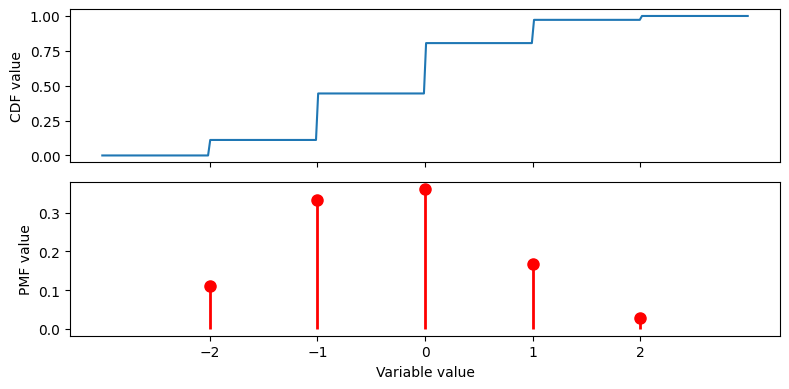

In [3]:
# Example 1
Omega = (-1,0,1)
Pr = (1/3.,1/2.,1/6.)
s = iid.rv_discrete(values=(Omega,Pr))
t = iid.rv_discrete(values=(Omega,Pr))
k = ConvolveDiscreteAndDiscrete(s, t)
fig, ax = k.plot_distributions()


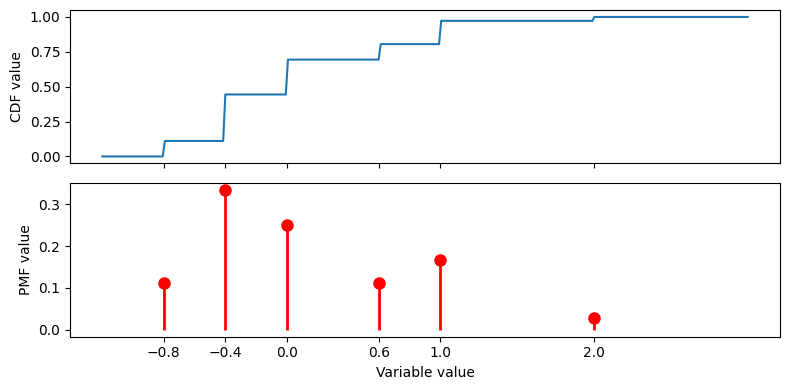

In [4]:
# Example 2
Omega = (-.4,0,1)
Pr = (1/3.,1/2.,1/6.)
s = iid.rv_discrete(values=(Omega,Pr))
t = iid.rv_discrete(values=(Omega,Pr))
k = ConvolveDiscreteAndDiscrete(s, t)
fig, ax = k.plot_distributions()

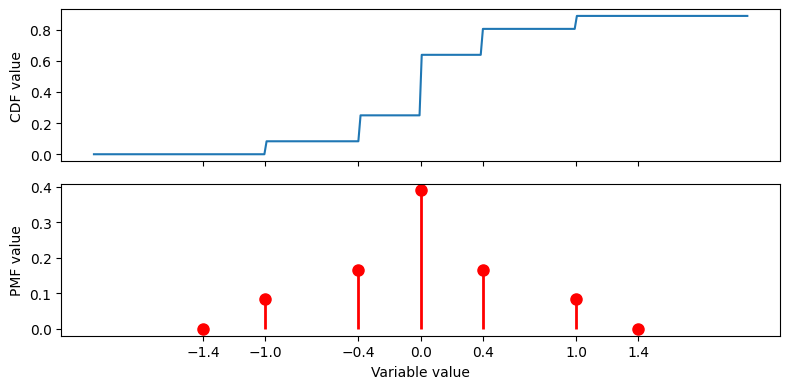

In [5]:
# Example 3
Omega1 = (-.4,0.,1.)
Pr1 = (1/3.,1/2.,1/6.)

Omega2 = (-1.,0.,0.4)
Pr2 = (1/6., 1/2.,1/3.)
s = iid.rv_discrete(values=(Omega1,Pr1))
t = iid.rv_discrete(values=(Omega2,Pr2))
k = ConvolveDiscreteAndDiscrete(s, t)
fig, ax = k.plot_distributions()

### 3.3 Convolution of two independent continuous random variables

In [6]:
from utils.ConvolveContinuousAndContinuous import ConvolveContinuousAndContinuous

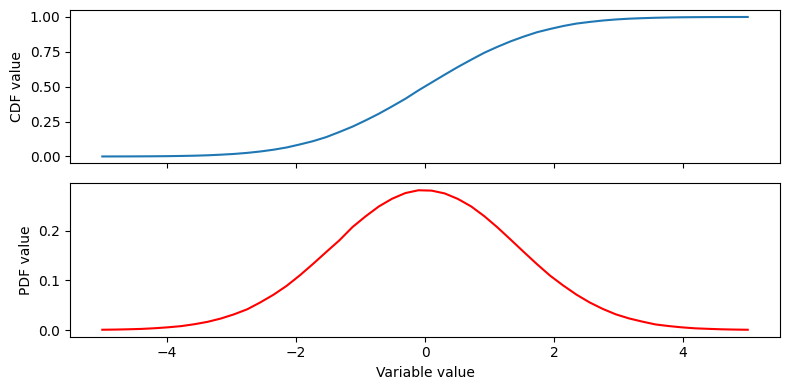

In [7]:
# Example 1
x = iid.norm(loc=-1)    # Create continuous rv
y = iid.norm(loc=1)
z = ConvolveContinuousAndContinuous(x, y)
fig, ax = z.plot_distributions()

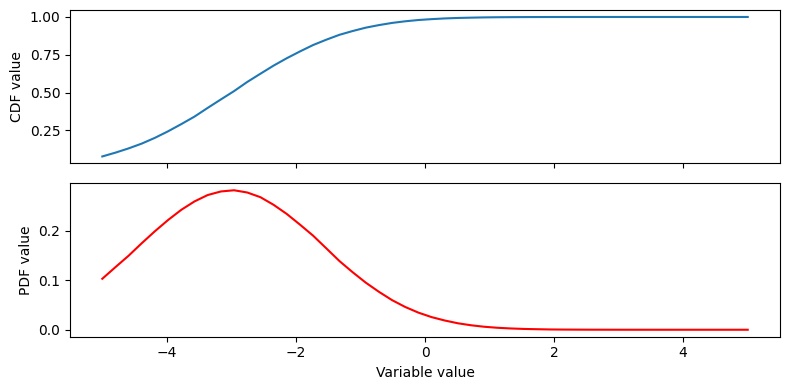

In [8]:
# Example 2
x = iid.norm(loc=-4)    # Create continuous rv
y = iid.norm(loc=1)
z = ConvolveContinuousAndContinuous(x, y)
fig, ax = z.plot_distributions()

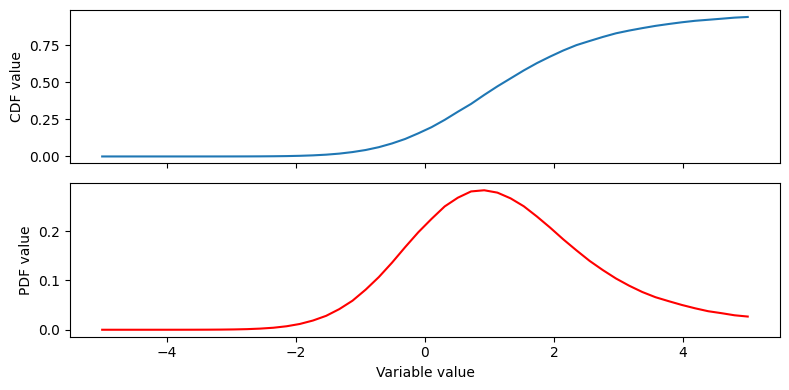

In [9]:
# Example 3
x = iid.norm(loc=0)    # Create continuous rv
y = iid.lognorm(1)
z = ConvolveContinuousAndContinuous(x, y)
fig, ax = z.plot_distributions()

### 5.3 General Weighted Linear Regression

In [10]:
k = 3 # Number of observables in T
l = 4
m = 3

mu_l = [0]*l
Sigma_l=[[1 ,.5, 0, 0],
         [.5, 2, 0, 0],
         [0 , 0, 3,.5],
         [0 , 0,.5, 4]]

Sigma_k=[[1 ,.5, 0],
         [.5, 2, 0],
         [0 , 0, 3]]

T = multivariate_normal(mu_l,Sigma_l)

u = multivariate_normal(cov=Sigma_k)

beta = np.random.random(size=(m,k))

D = np.random.random(size=(l,m)) 

N=1000 # Sample size

# Now: Transform rvs into a sample
T = T.rvs(N)

u = u.rvs(N) # Replace u with a sample

X = (T**3)@D  # Note use of ** operator for exponentiation

y = X@beta + u # Note use of @ operator for matrix multiplication

b = np.linalg.lstsq(T.T@X,T.T@y, rcond=None)[0] # lstsqs returns several results; we pick the first

e = y - X@b

print(b)

TXplus = np.linalg.pinv(T.T@X) # Moore-Penrose pseudo-inverse

# Covariance matrix of b
vb = e.var()*TXplus@T.T@T@TXplus.T  # u is known to be homoskedastic

print(vb)

[[0.014127   0.08663023 0.48104324]
 [0.44682994 0.48596566 0.40832865]
 [0.99413961 0.88553579 0.42367972]]
[[ 3.02024514e-04 -1.11883012e-04 -1.73614878e-04]
 [-1.11883012e-04  7.45565841e-05  2.91917372e-05]
 [-1.73614878e-04  2.91917372e-05  1.41854648e-04]]


### 6.2 SUR

In [11]:
k = 3 # Number of observables in T
l = 4
m = 4

mu_l = [0]*l
Sigma_l=[[1 ,.5, 0, 0],
         [.5, 2, 0, 0],
         [0 , 0, 3,.5],
         [0 , 0,.5, 4]]

Sigma_k=[[1 ,.5, .2],
         [.5, 2, .75],
         [.2 , 0.75, 3]]

T = multivariate_normal(mu_l,Sigma_l)

u = multivariate_normal(cov=Sigma_k)

beta = np.random.random(size=(m,k))

N=1000 # Sample size

# Now: Transform rvs into a sample
T = T.rvs(N)

u = u.rvs(N) # Replace u with a sample

X = T

y = X@beta + u # Note use of @ operator for matrix multiplication

b = np.linalg.lstsq(T.T@X,T.T@y, rcond=None)[0] # lstsqs returns several results; we pick the first

e = y - X@b

print(b)


[[0.70899691 0.44797353 0.58507451]
 [0.0230611  0.61343929 0.10178858]
 [0.10187675 0.05573887 0.46657107]
 [0.07558368 0.881151   0.31986511]]


In [12]:
beta_ols = np.ones_like(beta)
for i in range(y.shape[1]):
    y_temp = y[:,i]
    b_temp = np.linalg.lstsq(T.T@X,T.T@y_temp, rcond=None)[0] 
    beta_ols[:,i] = b_temp
    
beta_ols

array([[0.70899691, 0.44797353, 0.58507451],
       [0.0230611 , 0.61343929, 0.10178858],
       [0.10187675, 0.05573887, 0.46657107],
       [0.07558368, 0.881151  , 0.31986511]])

### 7. Food Expenditures in India

In [13]:
df = pd.read_parquet("../Data/total_expenditures.parquet")


In [14]:
df = df.reset_index()

AttributeError: 'function' object has no attribute 'reset_index'

In [ ]:
# Lets write down the estimator: code from lecture
def kernel_estimator(X,h, k):
    """
    Use data X to estimate a density, using bandwidth h.
    """
    return lambda x: k((X-x)/h).mean()/h

# Here are two kernel's: also code from lecture
rect_k  = lambda u: (np.abs(u) < 3**.5)/(2*3**.5)  # Rectangular kernel
gauss_k = lambda u: np.exp(-(u**2)/2)/np.sqrt(2*np.pi) # Gaussian kernel

# Data
hh_exp = df.total_value
log_hh_exp = np.log(hh_exp)

# Set some parameters
h_s     = hh_exp.std()*hh_exp.count()**(-1/5)*1.06 # Silverman bandwidth
log_h_s = log_hh_exp.std()*log_hh_exp.count()**(-1/5)*1.06 # Silverman bandwidth
h_coarse = 10000 
h_fine   = 100    

# Silverman gaussian estimator
gauss_estimator_silverman = kernel_estimator(hh_exp, h_s, gauss_k)

# Tuned estimators
gauss_estimator_fine   = kernel_estimator(hh_exp, h_fine, gauss_k)
gauss_estimator_coarse = kernel_estimator(hh_exp, h_coarse, gauss_k)

# Figure parameters
hist_bin_width = 1000
fig_y_limit = 50000

In [ ]:
# Set a grid to get the KDE estimates
V = np.linspace(0, fig_y_limit, hist_bin_width)

# Get KDE estimates
gauss_estimates_silverman = [gauss_estimator_silverman(i) for i in V]
gauss_estimates_fine      = [gauss_estimator_fine(i) for i in V]
gauss_estimates_coarse    = [gauss_estimator_coarse(i) for i in V]

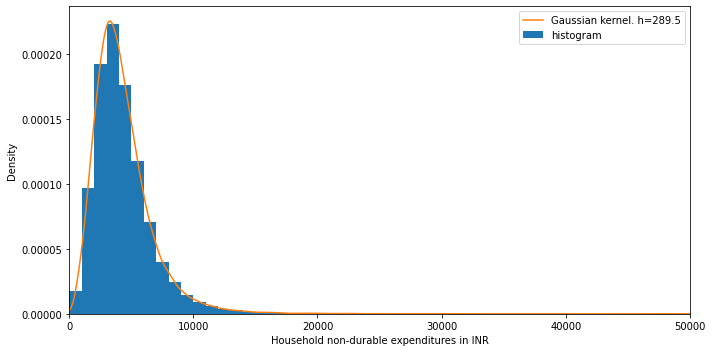

In [ ]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(10, 5))
ax.hist(hh_exp, 
        bins=range(min(hh_exp), fig_y_limit + hist_bin_width, hist_bin_width),
        density=True)
ax.plot(V, gauss_estimates_silverman, lw=1.5)
ax.set_xlim([0, 50000])
ax.set_xlabel("Household non-durable expenditures in INR")
ax.set_ylabel("Density")
ax.legend(["Gaussian kernel. h={:.1f}".format(h_s),"histogram"])
# ax.set_title("The histogram and kernel density estimator using Silverman's rule.")
fig.tight_layout()
fig.savefig("../Output/fig_silverman_gauss_kde.pdf")
plt.show()

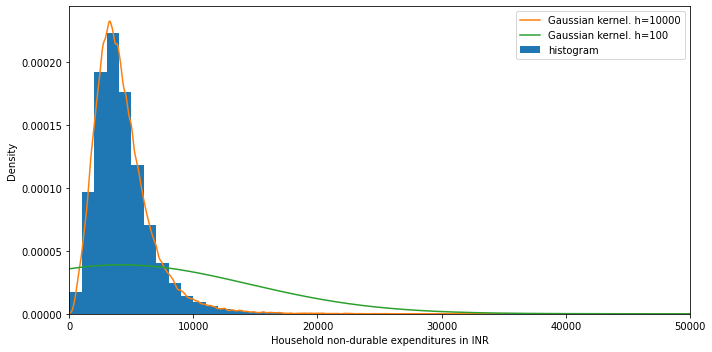

In [ ]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(10, 5))
ax.hist(hh_exp, 
        bins=range(min(hh_exp), fig_y_limit + hist_bin_width, hist_bin_width),
        density=True)
ax.plot(V, gauss_estimates_fine, lw=1.5)
ax.plot(V, gauss_estimates_coarse, lw=1.5)
ax.set_xlim([0, 50000])
ax.set_xlabel("Household non-durable expenditures in INR")
ax.set_ylabel("Density")
ax.legend(["Gaussian kernel. h={:.0f}".format(h_coarse),
           "Gaussian kernel. h={:.0f}".format(h_fine),
           "histogram"])
# ax.set_title("The histogram and kernel density estimator.")
fig.tight_layout()
fig.savefig("../Output/fig_kernel_trials_gauss_kde.pdf")
plt.show()

We want to transform the variable $x$ into $y = g(x) = log(x)$. Note that $supp(x) = [0, \infty]$, but $supp(g(x)) = R$. Note that $g^{-1}(y) = e^y$ and $\frac{\partial g^{-1}(y)}{\partial y} = e^y$. So from the inverse Jacobian rule:

$$f_Y(y) = f_X(g^{-1}(y))|\frac{\partial g^{-1}(y)}{\partial y} | = f_X(e^y)e^y \;\; y \in R$$

In [ ]:
log_gauss_estimator_transform = lambda y: gauss_estimator_silverman(np.exp(y))*np.exp(y)
log_gauss_estimator           = kernel_estimator(log_hh_exp, log_h_s, gauss_k)

In [ ]:
V_log = np.linspace(1,11,500)
log_gauss_estimates_transform = [log_gauss_estimator_transform(i) for i in V_log]
log_gauss_estimates           = [log_gauss_estimator(i) for i in V_log]

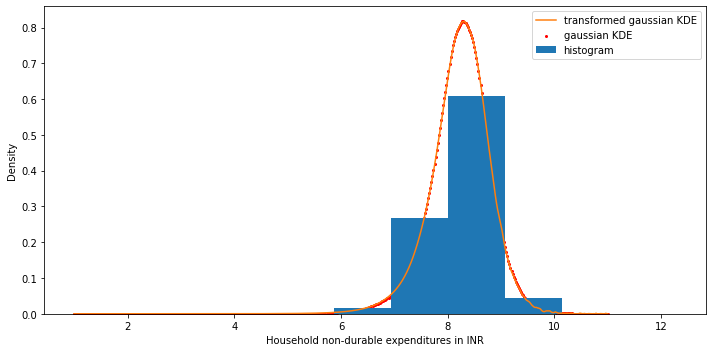

In [ ]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(10, 5))
ax.hist(log_hh_exp, density=True)
ax.plot(V_log, log_gauss_estimates_transform, lw=1.5)
ax.scatter(V_log, log_gauss_estimates,c='r',s=4)

ax.set_xlabel("Household non-durable expenditures in INR")
ax.set_ylabel("Density")
ax.legend(["transformed gaussian KDE",
           "gaussian KDE",
           "histogram"])
# ax.set_title("The histogram and kernel density estimator.")
fig.tight_layout()
fig.savefig("../Output/fig_kernel_transformed_gauss_kde.pdf")

plt.show()